In [47]:
# loading required libraries
import geopandas as gpd
import matplotlib.pyplot as plt

### Geojson files

- GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. 
- GeoJSON supports the following geometry types: Point, LineString, Polygon, MultiPoint, MultiLineString, and MultiPolygon. 

In [48]:
# loading the geojson file
gdf = gpd.read_file('Flood_signs.geojson')
gdf.head()

,OBJECTID,Flood_Warning,Parish_Ward,Location_of_Sign,Type_of_Sign,geometry
0,1,Flood Alert 946,Guildhall Ward,KING STREET - Junction with Clifford Street,1 x Permanent,POINT (-1.08192 53.95749)
1,2,Flood Alert 946,Guildhall Ward,KING STREET - Junction with Clifford Street,1 x Permanent,POINT (-1.08191 53.95745)
2,3,Flood Alert 946,Guildhall Ward,CUMBERLAND STREET - Junction with Clifford Str...,1 x Permanent,POINT (-1.08190 53.95709)
3,4,Flood Alert 946,Guildhall Ward,CUMBERLAND STREET - Junction with Clifford Str...,1 x Permanent,POINT (-1.08204 53.95697)
4,5,Flood Alert 946,Guildhall Ward,PECKITT STREET - Junction with Clifford Street,1 x Free Standing,POINT (-1.08129 53.95600)


<Axes: >

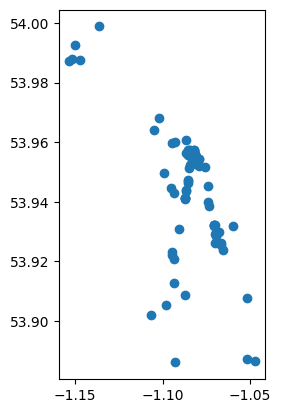

In [49]:
gdf.plot()

In [50]:
# loading the geojson file
gdf = gpd.read_file('counties.geojson')
gdf.head()

,OBJECTID,ID_,COUNTY_NAM,CONST_CODE,CONSTITUEN,COUNTY_COD,Shape_Leng,Shape_Area,geometry
0,1,5543,NAIROBI,288,KAMUKUNJI,47,1.559787,0.057423,"POLYGON ((36.90458 -1.16071, 36.90809 -1.16157..."
1,2,6634,MOMBASA,3,KISAUNI,1,0.885586,0.023325,"POLYGON ((39.68311 -4.06074, 39.68091 -4.06233..."
2,3,6600,KWALE,10,KINANGO,2,4.284182,0.758266,"POLYGON ((39.32093 -3.57045, 39.31934 -3.57515..."
3,4,6731,KILIFI,13,KALOLENI,3,5.333080,1.025338,"POLYGON ((39.71113 -3.91115, 39.70691 -3.91157..."
4,5,5806,TANA RIVER,19,GALOLE,4,10.280449,3.184213,"POLYGON ((39.02814 -0.00398, 39.03632 -0.00416..."


<Axes: >

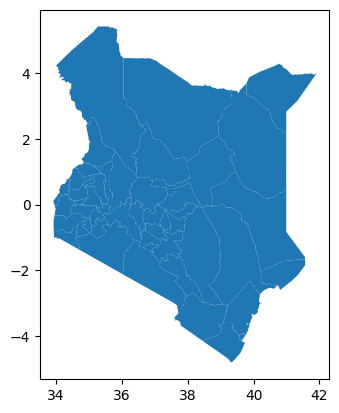

In [51]:
gdf.plot()

#### Measuring the area of each polygon

In [52]:
gdf = gdf.set_index("COUNTY_NAM")
gdf

,OBJECTID,ID_,CONST_CODE,CONSTITUEN,COUNTY_COD,Shape_Leng,Shape_Area,geometry
COUNTY_NAM,,,,,,,,
NAIROBI,1,5543,288,KAMUKUNJI,47,1.559787,0.057423,"POLYGON ((36.90458 -1.16071, 36.90809 -1.16157..."
MOMBASA,2,6634,3,KISAUNI,1,0.885586,0.023325,"POLYGON ((39.68311 -4.06074, 39.68091 -4.06233..."
KWALE,3,6600,10,KINANGO,2,4.284182,0.758266,"POLYGON ((39.32093 -3.57045, 39.31934 -3.57515..."
KILIFI,4,6731,13,KALOLENI,3,5.333080,1.025338,"POLYGON ((39.71113 -3.91115, 39.70691 -3.91157..."
TANA RIVER,5,5806,19,GALOLE,4,10.280449,3.184213,"POLYGON ((39.02814 -0.00398, 39.03632 -0.00416..."
LAMU,6,6276,22,LAMU WEST,5,3.744689,0.743743,"POLYGON ((41.07789 -2.38246, 40.85975 -2.55543..."
TAITA TAVETA,7,6467,24,WUNDANYI,6,5.584451,1.393859,"POLYGON ((38.17389 -2.69984, 38.18213 -2.70393..."
GARISSA,8,2382,28,BALAMBALA,7,10.454326,3.541698,"POLYGON ((39.61219 0.68662, 39.61390 0.68303, ..."
WAJIR,9,663,36,WAJIR WEST,8,9.969422,4.606366,"POLYGON ((39.78589 3.69286, 39.78589 3.61284, ..."


In [53]:
gdf['area']=gdf.area
gdf['area']

C:\Users\USER\AppData\Local\Temp\ipykernel_5608\3461901367.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area']=gdf.area


COUNTY_NAM
NAIROBI             0.057424
MOMBASA             0.023323
KWALE               0.758262
KILIFI              1.025353
TANA RIVER          3.184181
LAMU                0.743752
TAITA TAVETA        1.393844
GARISSA             3.541701
WAJIR               4.606376
MANDERA             2.114343
MARSABIT            6.185046
ISIOLO              2.063636
MERU                0.568019
THARAKA - NITHI     0.209621
EMBU                0.229344
KITUI               2.475281
MACHAKOS            0.490985
NYANDARUA           0.265418
NYERI               0.270906
KIRINYAGA           0.119842
MURANG'A            0.205114
KIAMBU              0.206555
TURKANA             5.708137
WEST POKOT          0.754593
SAMBURU             1.707672
UASIN GISHU         0.275893
ELEGEYO-MARAKWET    0.245759
NANDI               0.230224
BARINGO             0.884499
LAIKIPIA            0.774716
NAKURU              0.607261
NAROK               1.453537
KAJIADO             1.779119
MAKUENI             0.664596
KER

### Making the map look more interesting - Choropleth maps

Choropleth maps -> are maps where the color of each shape is based on the value of an associated variable.

<Axes: >

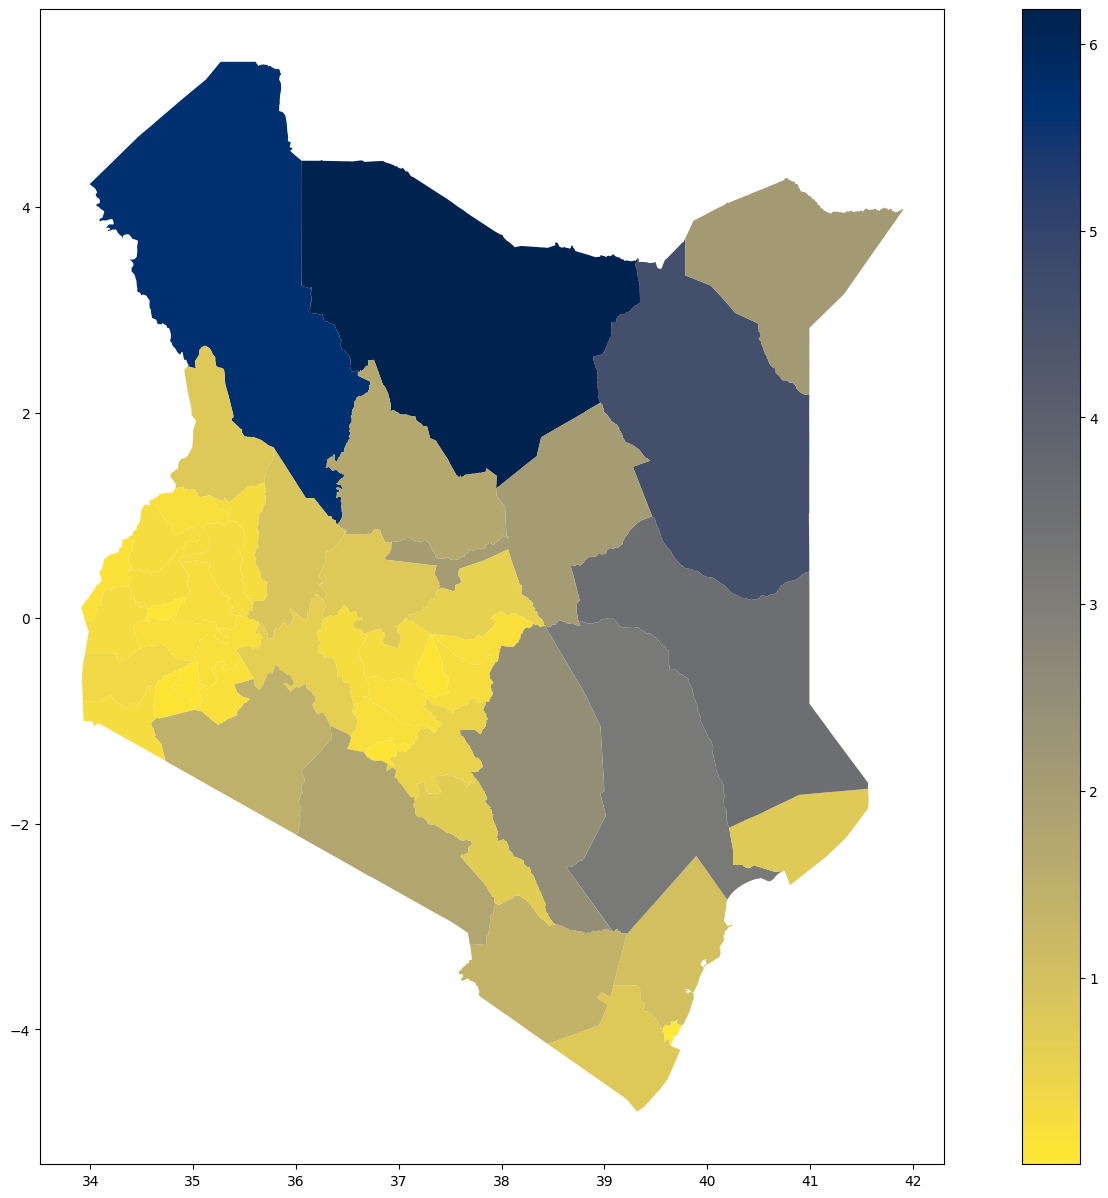

In [72]:
#Color coding the map using the area column
gdf.plot("area", legend=True,cmap='cividis_r',figsize=(20, 15))


In [81]:
# Creating an interactive map (>pip install folium matplotlib mapclassify)
gdf.explore("area", legend=False,cmap='Dark2_r')


### Checking the CRS

In [82]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
gdf.area.sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_5608\2903734255.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.area.sum()


48.43165652143711